In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql.functions import explode, split, col
from IPython import display
from time import sleep
import matplotlib.pyplot as plt

In [2]:
sc = SparkContext.getOrCreate()
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)

In [3]:
tweet_stream = spark.readStream.format("socket").option("host", "127.0.0.1").option("port", 6666).load()

In [4]:
tweet_words = tweet_stream.select(explode(split(tweet_stream.value, " ")).alias("word"))
sentiment_words = tweet_words.where((col("word")=="NEGATIVE") | (col("word")=="POSITIVE")|(col("word")=="VERY_POSITIVE") | (col("word")=="VERY_NEGATIVE") | (col("word")=="NEUTRAL")).groupBy("word").count()

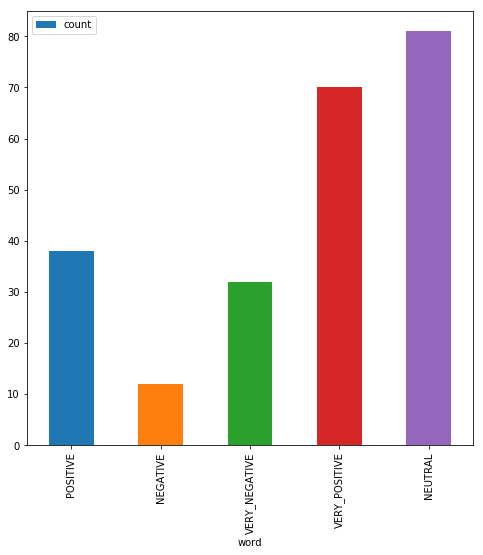

In [ ]:
query = sentiment_words.writeStream.queryName("df").format("memory").outputMode("complete").start()

itr = 0
while itr < 100:    
    sleep(1)        
    df_sentiment_words = sqlContext.sql("select * from df")
    
    if df_sentiment_words.count()>0:        
        
        df_plot = df_sentiment_words.toPandas()
        display.clear_output(wait=True)
        plt.rcParams['figure.figsize'] = (8,8)
        df_plot.plot.bar( x="word", y="count")
        plt.show()
    
    itr = itr + 1

query.awaitTermination()

In [ ]:
ssc.stop()